# Outline

### 1. Importing and Cleaning the Data 
### 2. Dealing with Categorical Data
### 3. Test Train Split and Normalization
### 4. Regression
### 5. Takeways

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - View 
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [454]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import scipy.stats as stats

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso


In [455]:
df = pd.read_csv('kc_house_data.csv')

## 1. Cleaning the Data

In [456]:
df.drop('yr_renovated', axis=1, inplace=True)
df.drop('view', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)


In [457]:
pd.set_option('display.max_columns', 500)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503


In [458]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [459]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [460]:
df['waterfront'].fillna(value=0, inplace=True)

In [461]:
 df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [462]:
df['waterfront'] = df['waterfront'].astype(int)

In [463]:
df.waterfront.head()

0    0
1    0
2    0
3    0
4    0
Name: waterfront, dtype: int64

In [464]:
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [465]:
num_basement = df['sqft_basement'][df['sqft_basement'] != '?']
num_basement = num_basement.astype(float)

In [466]:
df['sqft_basement'].replace({"?": 718.632047}, inplace=True )

In [467]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [468]:
df.sqft_basement[5:10]

5    1530.000000
6     718.632047
7       0.000000
8     730.000000
9       0.000000
Name: sqft_basement, dtype: float64

### Null Values Removed
Null values in waterfront have been changed to 0, given that the fact that values are either 1 for a waterfront view or 0 for no view, intuitively it makes sense for the null values to be given a value of 0 

A number of cells in the sqft_basemnt column had a value of "?" they were changed to the mean of the non zero values with is 718.63

###  In order to remove outliers 

Drop the row containing 33 bedrooms

Drop rows containing more than 7 bathrooms

Drop rows containin houses that are more than $3,000,000

In [469]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0.0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400.0,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0.0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910.0,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0.0,1987,47.6168,-122.045,1800,7503


In [470]:
df.drop(df.index[15856], inplace = True)

In [471]:
df = df[df['bathrooms'] < 7]

In [472]:
df = df[df.price < 3000000]

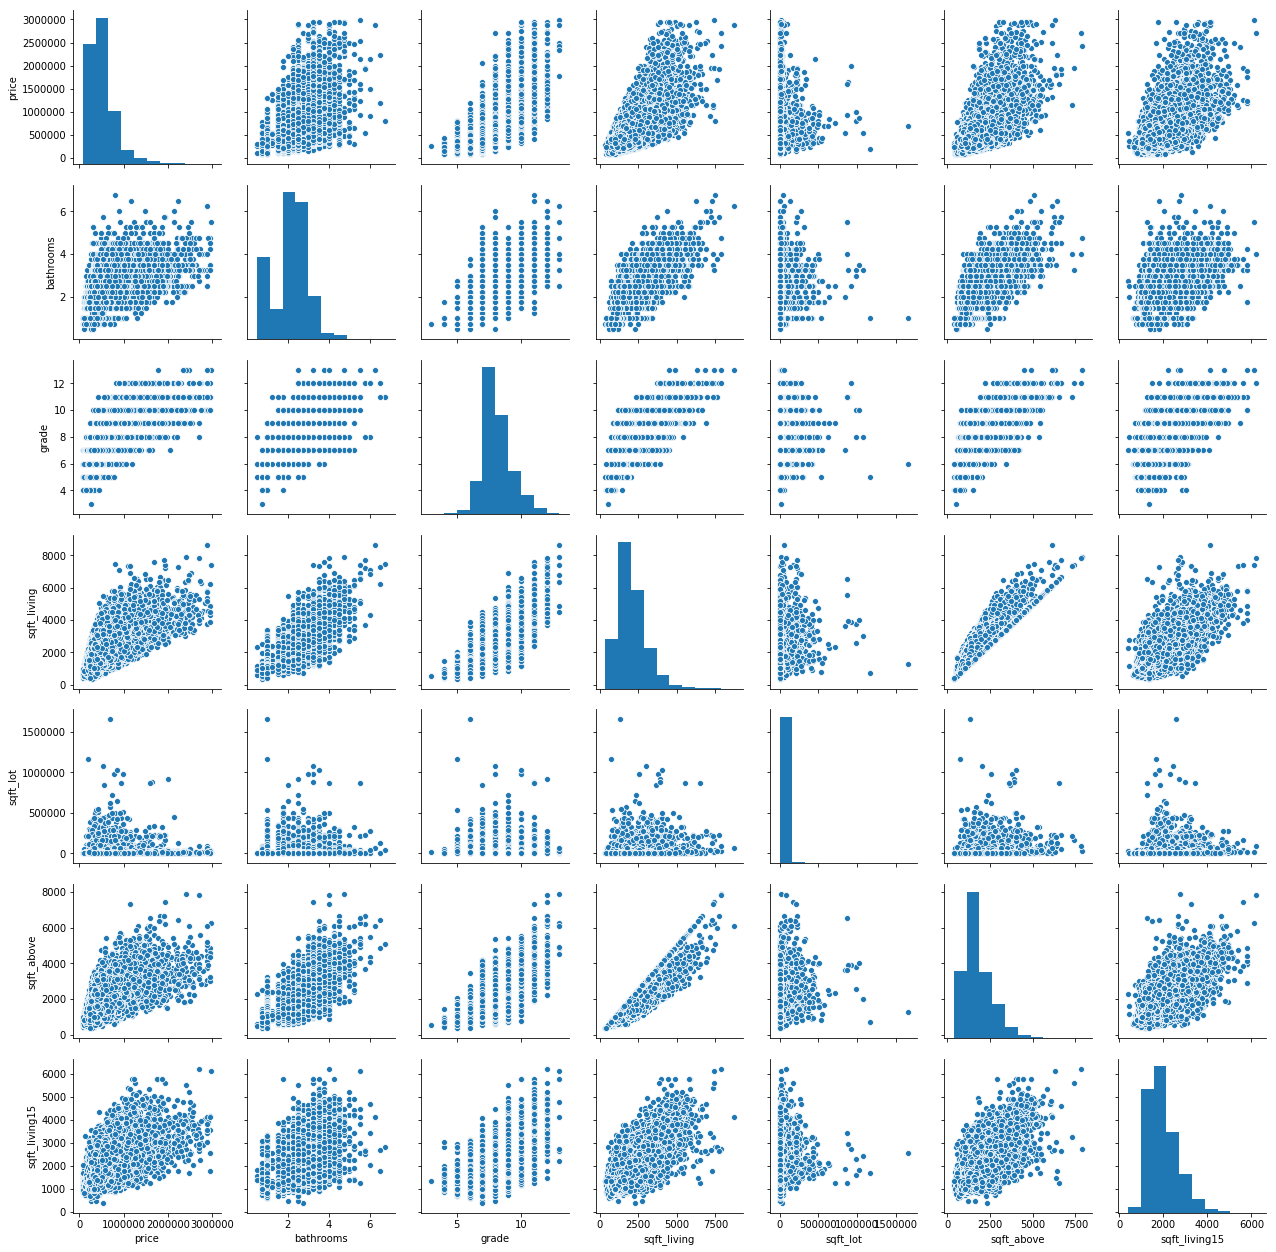

In [473]:
sns.pairplot(df, vars=['price', 'bathrooms', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15']);

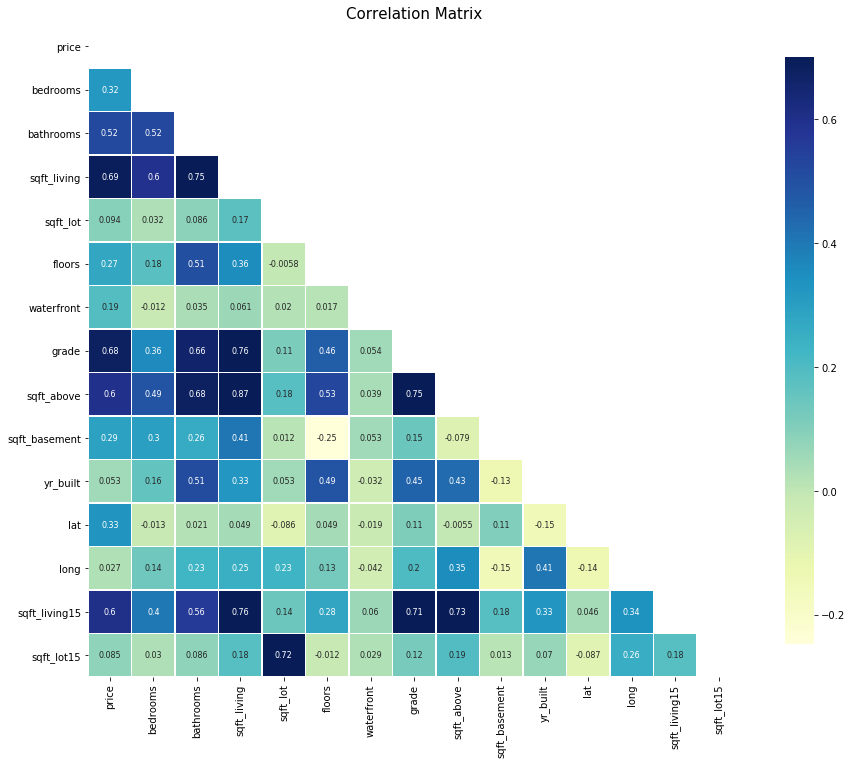

In [474]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
         'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix', fontsize=15)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});





According to the heatmap price seemes to be highly correlated with sqfr_living(0.7) and grade (0.68)

In [475]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.321572,0.518817,0.691060,0.094408,0.270837,0.190242,0.040275,0.680536,0.597160,0.293343,0.052943,0.333385,0.027194,0.601639,0.085476
bedrooms,0.321572,1.000000,0.523697,0.595452,0.032154,0.180818,-0.012063,0.022670,0.361339,0.489345,0.298728,0.161571,-0.013342,0.138028,0.401397,0.030365
bathrooms,0.518817,0.523697,1.000000,0.749735,0.086059,0.505148,0.034942,-0.128229,0.659893,0.677922,0.261840,0.513036,0.021133,0.229321,0.564303,0.085548
sqft_living,0.691060,0.595452,0.749735,1.000000,0.172991,0.355612,0.061351,-0.061287,0.759038,0.872684,0.407351,0.325220,0.048536,0.249585,0.757485,0.183767
sqft_lot,0.094408,0.032154,0.086059,0.172991,1.000000,-0.005842,0.019787,-0.008566,0.113755,0.183542,0.011645,0.052603,-0.086219,0.230090,0.143804,0.717476
floors,0.270837,0.180818,0.505148,0.355612,-0.005842,1.000000,0.016899,-0.265452,0.459510,0.526754,-0.247498,0.490963,0.048568,0.126699,0.278778,-0.011907
waterfront,0.190242,-0.012063,0.034942,0.061351,0.019787,0.016899,1.000000,0.015281,0.054280,0.039358,0.052991,-0.031929,-0.019242,-0.042465,0.060221,0.029058
condition,0.040275,0.022670,-0.128229,-0.061287,-0.008566,-0.265452,0.015281,1.000000,-0.149157,-0.162065,0.169902,-0.361149,-0.015306,-0.105645,-0.094004,-0.002681
grade,0.680536,0.361339,0.659893,0.759038,0.113755,0.459510,0.054280,-0.149157,1.000000,0.751679,0.146969,0.451506,0.111467,0.203835,0.709428,0.119706
sqft_above,0.597160,0.489345,0.677922,0.872684,0.183542,0.526754,0.039358,-0.162065,0.751679,1.000000,-0.078994,0.430310,-0.005529,0.353085,0.730403,0.194203


## 2. Dealing With Categorical Data

In order to transform categorical data into usable data the use of dummy variables in necessary 

In [476]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Floors was binned but later put made binary, 1 if the house has more than one floor, otherwise 0

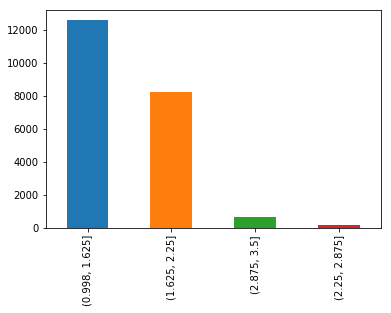

In [477]:
df.floors.value_counts()
bins_floors = pd.cut(df['floors'], 4)
bins_floors = bins_floors.cat.as_unordered()
floors = pd.get_dummies(bins_floors, prefix="fl", drop_first=True) 
bins_floors.value_counts().plot(kind='bar')

In [478]:
df['has_more_than_1_floor'] = df.floors.apply(lambda x: 1 if x > 1 else 0)


The year built column was initially binned but was later removed in order to impove the model

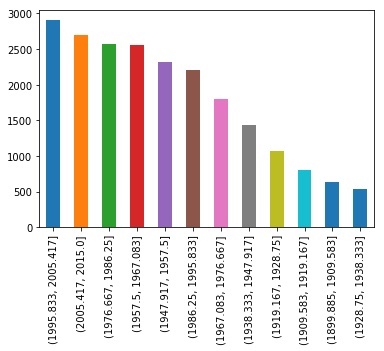

In [479]:
bins = [1900, 1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2005, 2010, 2015]
bins_year_built = pd.cut(df['yr_built'], 12)
bins_year_built = bins_year_built.cat.as_unordered()
year_built = pd.get_dummies(bins_year_built, prefix="yr", drop_first=True) #dropped years built 1900-1920
bins_year_built.value_counts().plot(kind='bar');

In [480]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

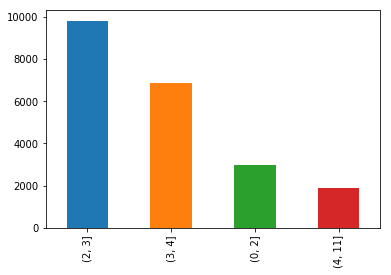

In [481]:
bins2 = [0,2,3,4,11]
bins_bedrooms = pd.cut(df['bedrooms'], bins2)
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bedrooms = pd.get_dummies(bins_bedrooms, prefix="bd", drop_first=True) #dropped 0 to 2 bedrooms
bins_bedrooms.value_counts().plot(kind='bar');

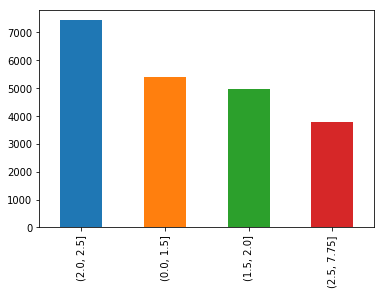

In [482]:
bins3 = [0,1.5,2, 2.5,7.75]
bins_bathrooms = pd.cut(df['bathrooms'], bins3)
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bathrooms = pd.get_dummies(bins_bathrooms, prefix="bth", drop_first=True) #dropped 0 to 1.5 bathrooms
bins_bathrooms.value_counts().plot(kind='bar');

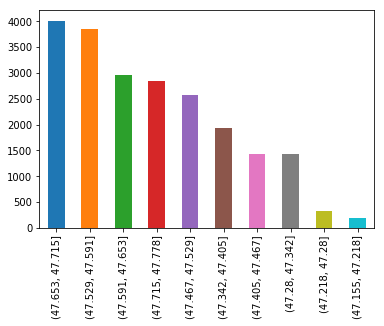

In [483]:
bins_lat = pd.cut(df['lat'], 10)
bins_lat = bins_lat.cat.as_unordered()
lat = pd.get_dummies(bins_lat, prefix="lat", drop_first=True)
bins_lat.value_counts().plot(kind='bar');

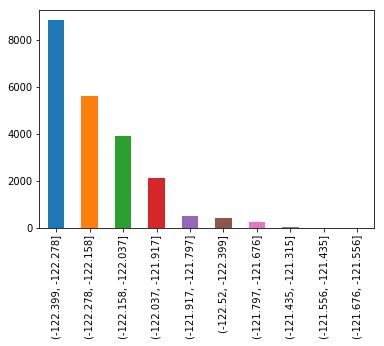

In [484]:
bins_long = pd.cut(df['long'], 10)
bins_long = bins_long.cat.as_unordered()
long = pd.get_dummies(bins_long, prefix="lg", drop_first=True)
bins_long.value_counts().plot(kind='bar');

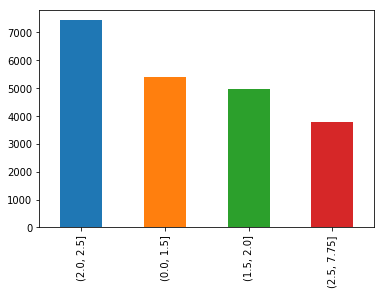

In [485]:
bins_bathrooms = pd.cut(df['bathrooms'], bins3)
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bathrooms = pd.get_dummies(bins_bathrooms, prefix="bth", drop_first=True) #dropped 0 to 1.5 bathrooms
bins_bathrooms.value_counts().plot(kind='bar');

In [486]:
condition = pd.get_dummies(df['condition'], prefix="con", drop_first=True)
df['has_more_than_1_floor'] = df.floors.apply(lambda x: 1 if x > 1 else 0)

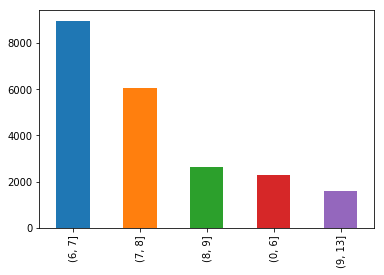

In [487]:
bins4 = [0,6,7,8,9,13]
bins_grade = pd.cut(df['grade'], bins4)
bins_grade = bins_grade.cat.as_unordered()
grade = pd.get_dummies(bins_grade, prefix="gr", drop_first=True) #dropped grade = 0 to 6
bins_grade.value_counts().plot(kind='bar');

In [426]:
#df.boxplot('price',by = 'floors', figsize = (10,10))

## 3. Train Test Split and normalization

I normalized and scaled a number of continuous features which ultimately improved my model

In [488]:
df_log= pd.DataFrame([])

df_log["price"] = np.log(df["price"])
#log transform each of the values.  

df_log["sqft_lot"] = np.log(df["sqft_lot"])
df_log["sqft_above"] = np.log(df["sqft_above"])
df_log["sqft_living15"] = np.log(df["sqft_living15"])
df_log["sqft_lot15"] = np.log(df["sqft_lot15"])
df_log["lat"] = np.log(df["lat"]) 
df_log["long"] = np.log(abs(df["long"]))

In [489]:
log_price = df_log["price"]

log_above = df_log["sqft_above"]
log_lot = df_log["sqft_lot"]
log_lot15 = df_log["sqft_lot15"]
log_live15 = df_log["sqft_living15"]
log_lat = df_log["lat"]
log_long = df_log["long"]

In [490]:
df["price"] = (log_price-min(log_price))/(max(log_price)-min(log_price))
df["long"] = (log_long-min(log_long))/(max(log_long)-min(log_long))
df["lat"]   = (log_lat-min(log_lat))/(max(log_lat)-min(log_lat))
df["sqft_lot"] = (log_lot-min(log_lot))/(max(log_lot)-min(log_lot))

df["sqft_living15"] = (log_live15-min(log_live15))/(max(log_live15)-min(log_live15))
df["sqft_above"] = (log_above-min(log_above))/(max(log_above)-min(log_above))
df["sqft_lot15"]   = (log_lot15-min(log_lot15))/(max(log_lot15)-min(log_lot15))

In [506]:
y = df.iloc[:, :1]
y.head()

,price
0,0.286996
1,0.530103
2,0.229551
3,0.561867
4,0.515432


In [507]:
X = df.iloc[:, 2:]
X = df.drop(['price', 'floors','bathrooms','bedrooms', 'grade', 'condition', 'yr_built'], axis=1)
X = pd.concat([X, bathrooms, bedrooms, grade, condition, year_built], axis=1)
X.head()


,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,has_more_than_1_floor,"bth_(1.5, 2.0]","bth_(2.0, 2.5]","bth_(2.5, 7.75]","bd_(2, 3]","bd_(3, 4]","bd_(4, 11]","gr_(6, 7]","gr_(7, 8]","gr_(8, 9]","gr_(9, 13]",con_2,con_3,con_4,con_5,"yr_(1909.583, 1919.167]","yr_(1919.167, 1928.75]","yr_(1928.75, 1938.333]","yr_(1938.333, 1947.917]","yr_(1947.917, 1957.5]","yr_(1957.5, 1967.083]","yr_(1967.083, 1976.667]","yr_(1976.667, 1986.25]","yr_(1986.25, 1995.833]","yr_(1995.833, 2005.417]","yr_(2005.417, 2015.0]"
0,1180,0.295858,0,0.379185,0.0,0.573100,0.783231,0.441342,0.300162,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2570,0.326644,0,0.578366,400.0,0.909499,0.834570,0.525882,0.342058,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,770,0.366664,0,0.239617,0.0,0.936533,0.763351,0.699256,0.349544,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1960,0.280700,0,0.341022,910.0,0.588526,0.895810,0.446739,0.283185,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1680,0.340224,0,0.494689,0.0,0.742607,0.607490,0.548854,0.339562,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [369]:
#original regresson model that produced an r squared of 0.757 and a RMSE of 158,000

#X = df.iloc[:, 2:]
#X = df.drop(['price', 'floors','bathrooms','bedrooms', 'grade', 'sqft_lot15', 'condition', 'yr_built', 'lat', 'long'], axis=1)
#X = pd.concat([X, bathrooms, bedrooms, grade, condition, lat, long, year_built], axis=1)
#X = X.drop(['bth_(1.5, 2.0]', 'con_2', 'bd_(2, 3]', 'bth_(2.0, 2.5]', 'lat_(47.467, 47.529]', 'lg_(-122.278, -122.158]', 'lg_(-121.797, -121.676]', 'lg_(-121.676, -121.556]', 'lg_(-121.556, -121.435]', 'yr_(1909.583, 1919.167]', 'yr_(1928.75, 1938.333]'], axis=1)


#reg = LinearRegression()
#reg_model = reg.fit(X_train, y_train)
#X_int = sm.add_constant(X)
#model = sm.OLS(y,X_int).fit()
#model.summary()

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

X_train_orig = X_train 
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape) 

(17234, 39)
(4309, 39)
(17234, 1)
(4309, 1)


Making sure that all of my columns do not contain null values

In [373]:
X.isna().any()

sqft_living                False
sqft_lot                   False
waterfront                 False
sqft_above                 False
sqft_basement              False
sqft_living15              False
has_more_than_1_floor      False
bth_(2.5, 7.75]            False
bd_(3, 4]                  False
bd_(4, 11]                 False
gr_(6, 7]                  False
gr_(7, 8]                  False
gr_(8, 9]                  False
gr_(9, 13]                 False
con_3                      False
con_4                      False
con_5                      False
lat_(47.218, 47.28]        False
lat_(47.28, 47.342]        False
lat_(47.342, 47.405]       False
lat_(47.405, 47.467]       False
lat_(47.529, 47.591]       False
lat_(47.591, 47.653]       False
lat_(47.653, 47.715]       False
lat_(47.715, 47.778]       False
lg_(-122.399, -122.278]    False
lg_(-122.158, -122.037]    False
lg_(-122.037, -121.917]    False
lg_(-121.917, -121.797]    False
lg_(-121.435, -121.315]    False
yr_(1919.1

### Checking for normality and collinearity

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


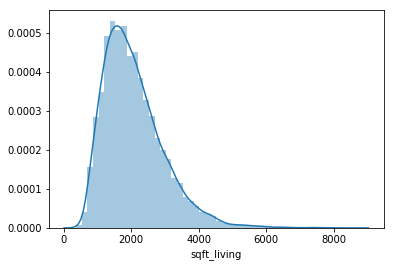

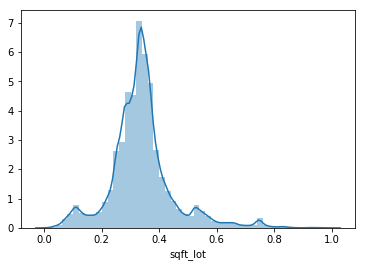

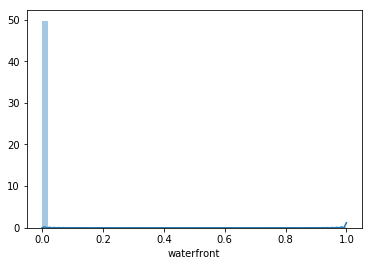

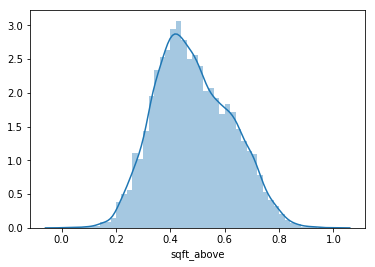

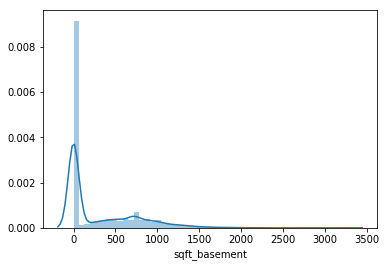

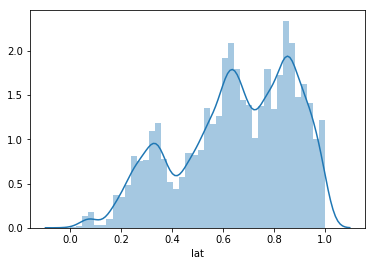

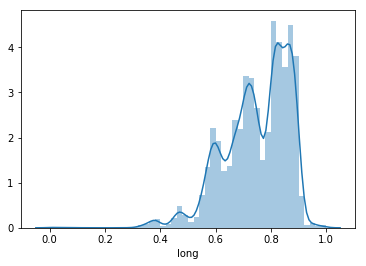

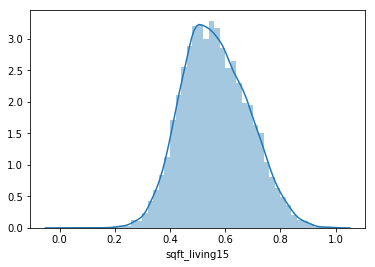

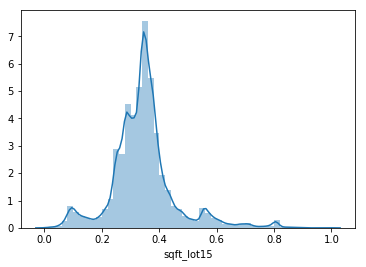

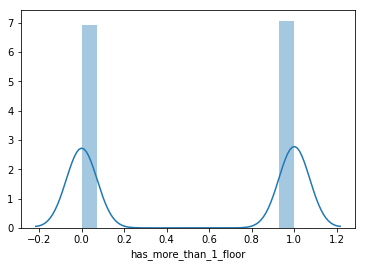

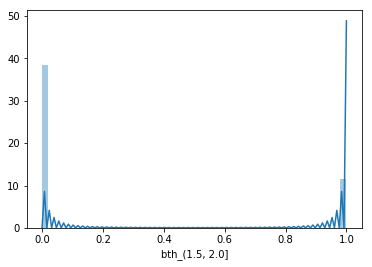

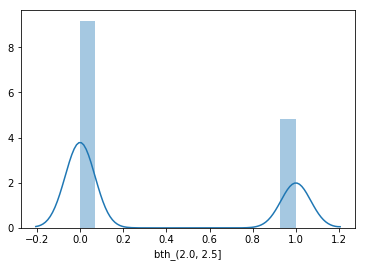

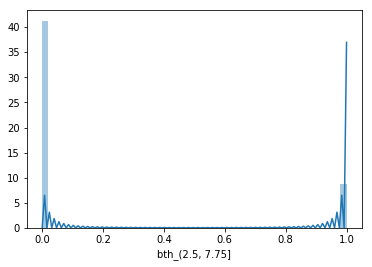

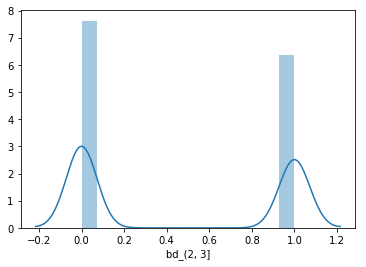

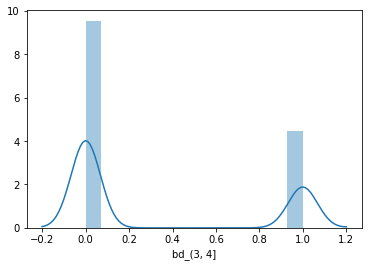

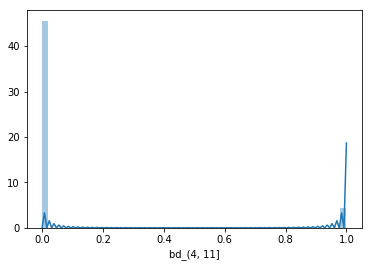

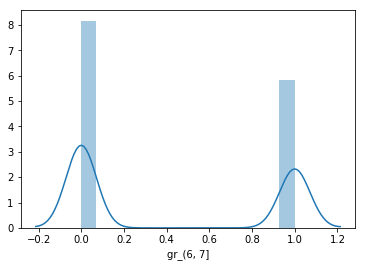

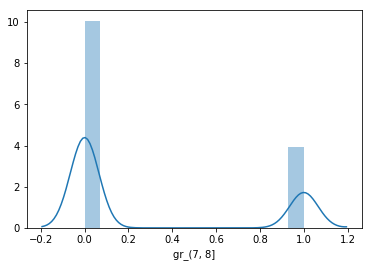

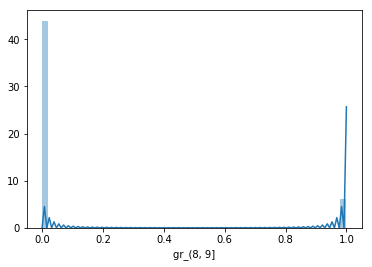

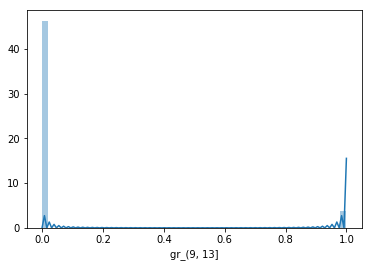

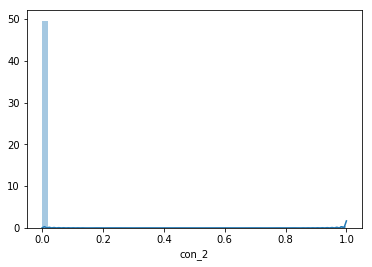

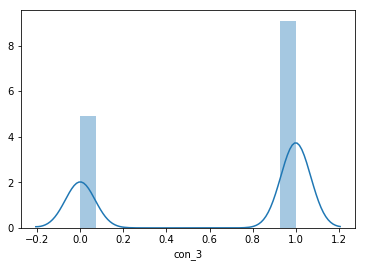

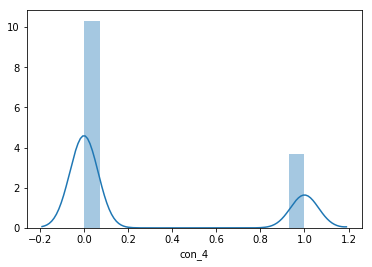

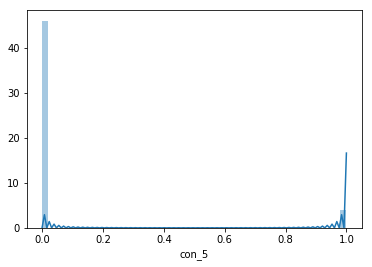

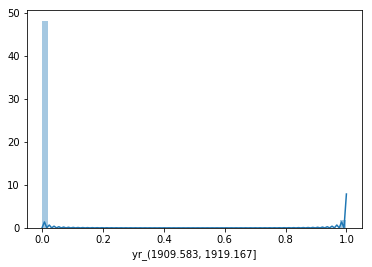

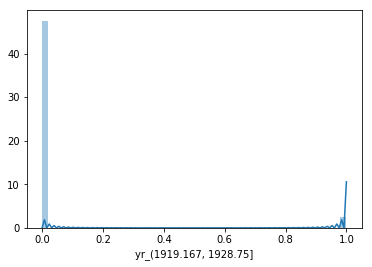

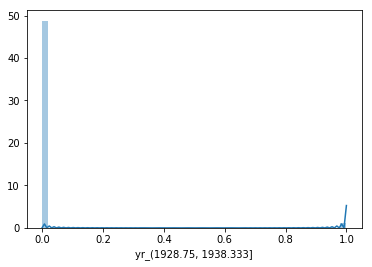

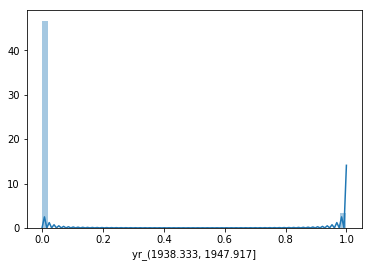

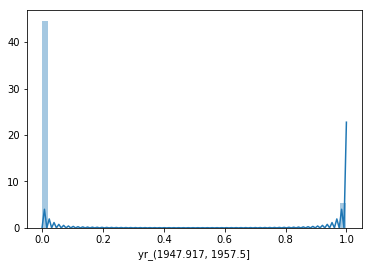

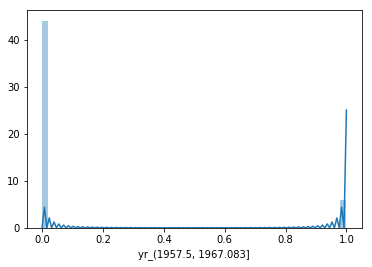

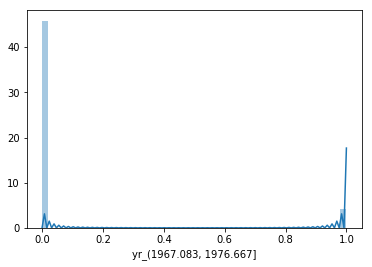

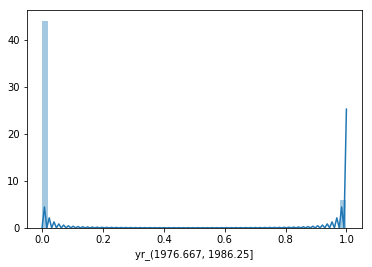

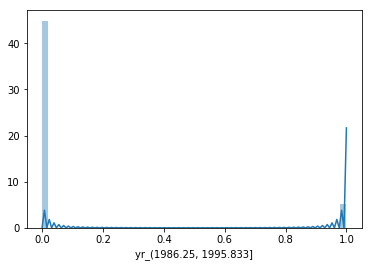

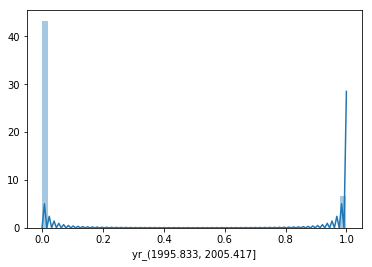

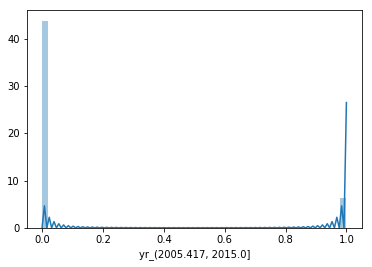

In [521]:
for columns in X:
    sns.distplot(X[columns])
    plt.show()

 Split that data for training and testing, 80% and 20% respetively

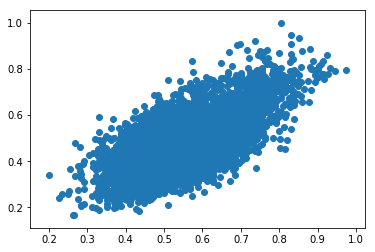

In [443]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(X_test['sqft_living15'],predictions);


In [377]:
X.head()

,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,sqft_living15,has_more_than_1_floor,"bth_(2.5, 7.75]","bd_(3, 4]","bd_(4, 11]","gr_(6, 7]","gr_(7, 8]","gr_(8, 9]","gr_(9, 13]",con_3,con_4,con_5,"lat_(47.218, 47.28]","lat_(47.28, 47.342]","lat_(47.342, 47.405]","lat_(47.405, 47.467]","lat_(47.529, 47.591]","lat_(47.591, 47.653]","lat_(47.653, 47.715]","lat_(47.715, 47.778]","lg_(-122.399, -122.278]","lg_(-122.158, -122.037]","lg_(-122.037, -121.917]","lg_(-121.917, -121.797]","lg_(-121.435, -121.315]","yr_(1919.167, 1928.75]","yr_(1938.333, 1947.917]","yr_(1947.917, 1957.5]","yr_(1957.5, 1967.083]","yr_(1967.083, 1976.667]","yr_(1976.667, 1986.25]","yr_(1986.25, 1995.833]","yr_(1995.833, 2005.417]","yr_(2005.417, 2015.0]"
0,1180,5650,0,0.379185,0.0,0.441342,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2570,7242,0,0.578366,400.0,0.525882,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,770,10000,0,0.239617,0.0,0.699256,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,5000,0,0.341022,910.0,0.446739,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1680,8080,0,0.494689,0.0,0.548854,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## 4. Regression

In [522]:
f = 'price ~ floors+sqft_living+yr_built+sqft_lot'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     5861.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        06:53:35   Log-Likelihood:                 19420.
No. Observations:               21543   AIC:                        -3.883e+04
Df Residuals:                   21538   BIC:                        -3.879e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4282      0.051     47.344      0.000       2.328       2.529
floors          0.0360      0.002     22.529      0.000       0.033       0.039
sqft_living     0.0001   9.22e-07    128.596      0.000       0.000       0.000
yr_built       -0.0011   2.67e-05    -41.849      0.000      -0.001      -0.001
sqft_lot       -0.1181      0.007    -16.865      0.000      -0.132      -0.104
==============================================================================
Omnibus:                       29.377   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.478
Skew:                          -0.072   Prob(JB):                     2.41e-07
Kurtosis:                       3.115   Cond. No.                     2.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [523]:
f = 'grade ~ sqft_living+sqft_living15'
model2 = smf.ols(formula=f, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.694e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        06:53:37   Log-Likelihood:                -23568.
No. Observations:               21543   AIC:                         4.714e+04
Df Residuals:                   21540   BIC:                         4.717e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.6263      0.025    182.359      0.000       4.577       4.676
sqft_living       0.0007   8.17e-06     88.423      0.000       0.001       0.001
sqft_living15     2.7058      0.061     44.194      0.000       2.586       2.826
==============================================================================
Omnibus:                      285.699   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              444.738
Skew:                           0.133   Prob(JB):                     2.67e-97
Kurtosis:                       3.652   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

X_train_orig = X_train 
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape) 

(17234, 35)
(4309, 35)
(17234, 1)
(4309, 1)


In [512]:
reg = LinearRegression()

reg_model = reg.fit(X_train, y_train)
X_int = sm.add_constant(X)


model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1974.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        06:42:26   Log-Likelihood:                 26976.
No. Observations:               21543   AIC:                        -5.388e+04
Df Residuals:                   21507   BIC:                        -5.359e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0048      0.015      0.325      0.745      -0.024       0.034
sqft_living              3.434e-05   2.52e-06     13.631      0.000    2.94e-05    3.93e-05
sqft_lot                    0.0598      0.011      5.331      0.000       0.038       0.082
waterfront                  0.1610      0.006     25.483      0.000       0.149       0.173
sqft_above                  0.0953      0.015      6.296      0.000       0.066       0.125
sqft_basement            1.749e-05   2.66e-06      6.577      0.000    1.23e-05    2.27e-05
lat                         0.2238      0.002     97.912      0.000       0.219       0.228
long                        0.0173      0.005      3.350      0.001       0.007       0.027
sqft_living15               0.1847      0.007     27.717      0.000       0.172       0.198
sqft_lot15                 -0.0714      0.011     -6.586      0.000      -0.093      -0.050
has_more_than_1_floor       0.0036      0.002      2.374      0.018       0.001       0.007
bth_(1.5, 2.0]              0.0170      0.002     10.836      0.000       0.014       0.020
bth_(2.0, 2.5]              0.0186      0.002      9.738      0.000       0.015       0.022
bth_(2.5, 7.75]             0.0335      0.002     14.461      0.000       0.029       0.038
bd_(2, 3]                  -0.0061      0.002     -3.622      0.000      -0.009      -0.003
bd_(3, 4]                  -0.0146      0.002     -7.411      0.000      -0.019      -0.011
bd_(4, 11]                 -0.0211      0.003     -8.130      0.000      -0.026      -0.016
gr_(6, 7]                   0.0562      0.002     29.573      0.000       0.052       0.060
gr_(7, 8]                   0.1019      0.002     43.798      0.000       0.097       0.106
gr_(8, 9]                   0.1497      0.003     52.330      0.000       0.144       0.155
gr_(9, 13]                  0.1990      0.004     56.421      0.000       0.192       0.206
con_2                       0.0374      0.014      2.683      0.007       0.010       0.065
con_3                       0.0719      0.013      5.550      0.000       0.046       0.097
con_4                       0.0926      0.013      7.143      0.000       0.067       0.118
con_5                       0.1064      0.013      8.160      0.000       0.081       0.132
yr_(1909.583, 1919.167]    -0.0084      0.004     -2.276      0.023      -0.016      -0.001
yr_(1919.167, 1928.75]     -0.0078      0.003     -2.258      0.024      -0.015      -0.001
yr_(1928.75, 1938.333]     -0.0327      0.004     -8.031      0.000      -0.041      -0.025
yr_(1938.333, 1947.917]    -0.0402      0.003    -11.965      0.000      -0.047      -0.034
yr_(1947.917, 1957.5]      -0.0581      0.003    -18.112      0.000      -0.064      -0.052
yr_(1957.5, 1967.083]      -0.0795      0.003  

Columns with abnormally high p-values were removed 

In [513]:
prediction = reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediction)))

RMSE: 0.06808519972488188


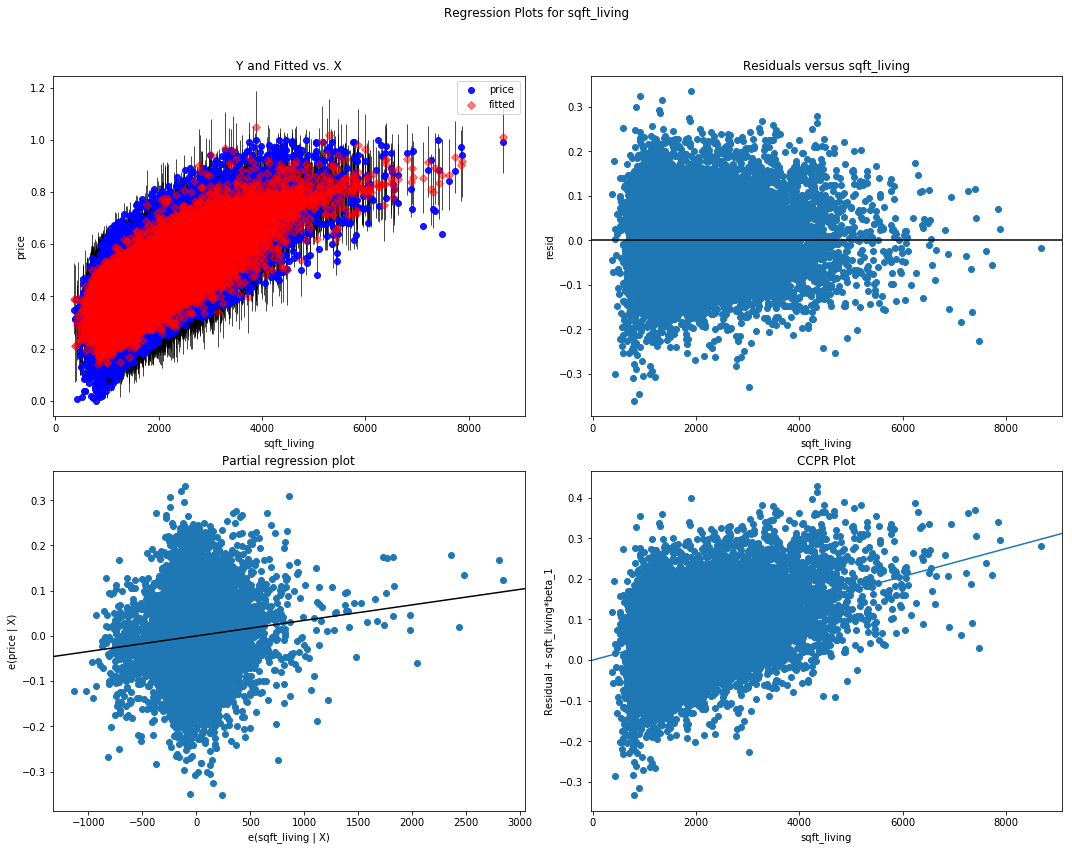

In [514]:
fig = plt.figure(figsize=(15, 12))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.show()

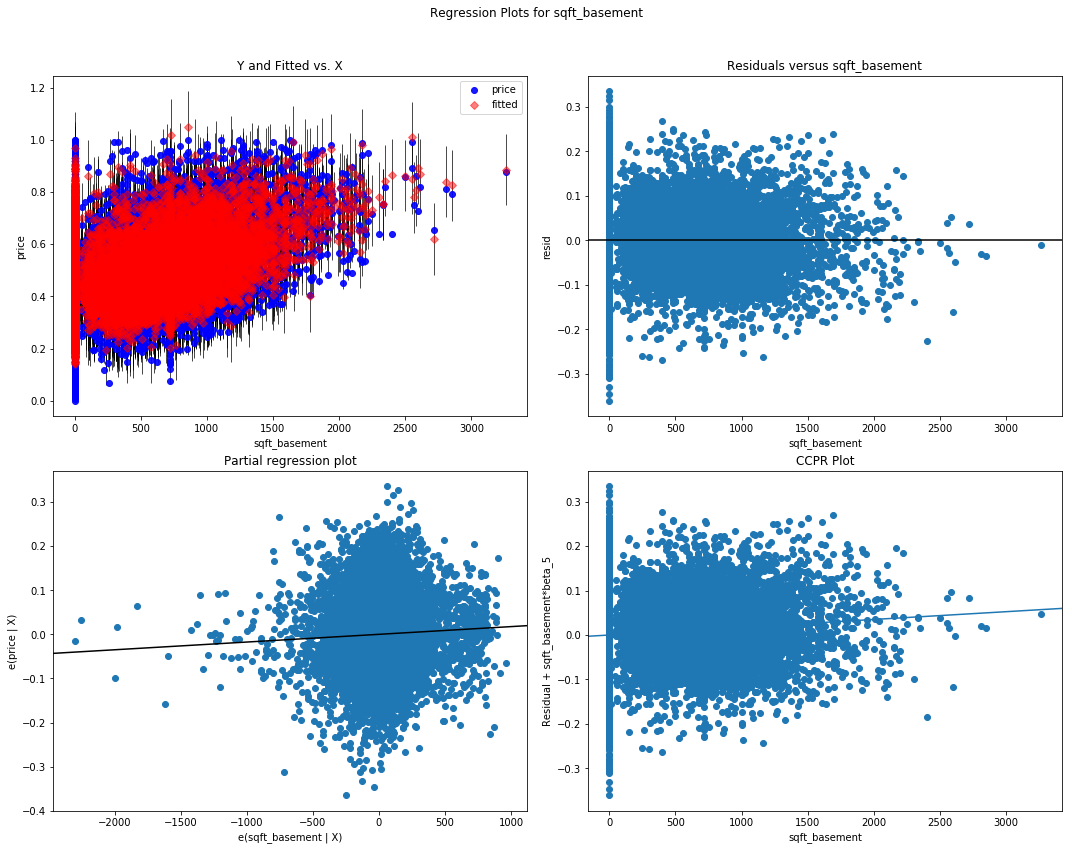

In [516]:
fig = plt.figure(figsize=(15, 12))
fig = sm.graphics.plot_regress_exog(model, 'sqft_basement', fig=fig)
plt.show()

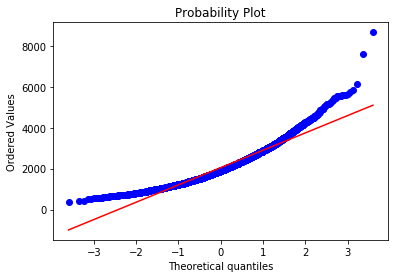

In [517]:
stats.probplot(X_test['sqft_living'], plot=plt);

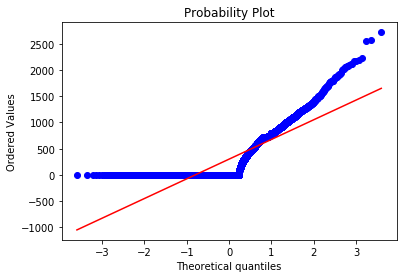

In [519]:
stats.probplot(X_test['sqft_basement'], plot=plt);

##  Takeways 

+ Accordding to my model square foot living and sqarefoot basement appear to be among the best indicators for predicting price, however the condition number is large, 1.41e+05. This might indicate that there are strong multicollinearity or other numerical problems.
 
+ Pandas and Sklern are two powerful libraries with an amazing amount of functionality that I've only begun to explore
+ Data cleaning, binning and creating dummie variables for categorical dataas well as the normalization of continous values through logarithmic transformation are absolutely vital parts of building regrssion models. This involves a great deal of trial and error and is by far the most time consumming part of the process.
